In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# this function helps you to convert the listed data in dataframe into a list (plddt etc.)
def string_to_float_list(string):
    return [float(i) if i!='None' else None for i in string.split(',') ]

# this function helps you to convert the sequence data in dataframe into a list (secondary structure etc.)
def ss_string_to_list(string):
    return [float(i) for i in string.strip('][').split(',')]

def merge_list(list_of_list):
    return [item for sublist in list_of_list for item in sublist]

def filter_function(df):
    filter_list = []
    for i in range(len(df)):
        if df['model_1_ptm_avg_plddt'][i] >= 70 and df['model_2_ptm_avg_plddt'][i] > 70 and df['model_3_ptm_avg_plddt'][i] > 70 and df['model_4_ptm_avg_plddt'][i] > 70 and df['model_5_ptm_avg_plddt'][i] >= 70:
            filter_list.append(True)
        else:
            filter_list.append(False)
    return filter_list

In [28]:
# feature in dataframe:
# ID, name, sequence, sequence_length, structure_avail, [model_name]_avg_plddt
# with model name: disulfide_bond, hydrogen_bond, salt_bridge, surface, SASA, secondary_structure, chirality, phi_angle, psi_angle, omega_angle, plddt

In [29]:
# Define function to calculate secondary structure percentage
def calc_ss_percent(ss_string):
    Helix_len = 0
    Sheet_len = 0
    LoopR_len = 0

    for i in range(len(ss_string)):
        if ss_string[i] == 'H':
            Helix_len += 1
        elif ss_string[i] == 'S':
            Sheet_len += 1
        elif ss_string[i] == 'L':
            LoopR_len += 1
        else:
            return BaseException
    return Helix_len/len(ss_string),Sheet_len/len(ss_string),LoopR_len/len(ss_string)

In [30]:
# read data
df_A501 = pd.read_csv('A501_results.tsv', sep='\t')
df_3DAC = pd.read_csv('3DAC_results.tsv', sep='\t')

df_list = [df_A501,df_3DAC]
tick_list = ["A501","3DAC"]
color_list = ["tab:red","tab:blue"]
cmap_list = ["Reds","Blues"]


# Calculate secondary structure percentage
for j in range(len(df_list)):

    ss_H_list = []
    ss_S_list = []
    ss_L_list = []
    for i in range(df_list[j].shape[0]):
        ss_H,ss_S,ss_L = calc_ss_percent(df_list[j]["secondary_structure_relaxed_model_3_ptm"][i])
        ss_H_list.append(ss_H)
        ss_S_list.append(ss_S)
        ss_L_list.append(ss_L)
    df_list[j]["ss_H"] = ss_H_list
    df_list[j]["ss_S"] = ss_S_list
    df_list[j]["ss_L"] = ss_L_list

print("A501 removed:",df_A501.shape[0]-sum(filter_function(df_A501)))
print("3DAC removed:",df_3DAC.shape[0]-sum(filter_function(df_3DAC)))


A501 removed: 158
3DAC removed: 304


d:\Anaconda3\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda3\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


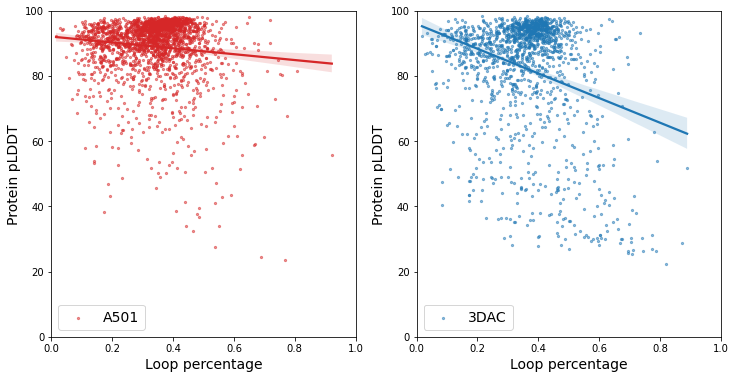

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(121)

reg_line = sns.regplot(df_A501["ss_L"],df_A501["model_3_ptm_avg_plddt"],color=color_list[0],label="A501",scatter_kws={"s":5,"alpha":0.5})
plt.xlabel("Loop percentage",fontsize=14)
plt.ylabel("Protein pLDDT",fontsize=14)
plt.legend(fontsize=14,loc="lower left")
plt.xlim(0,1)
plt.ylim(0,100)


plt.subplot(122)

reg_line = sns.regplot(df_3DAC["ss_L"],df_3DAC["model_3_ptm_avg_plddt"],color=color_list[1],label="3DAC",scatter_kws={"s":5,"alpha":0.5})
plt.xlabel("Loop percentage",fontsize=14)
plt.ylabel("Protein pLDDT",fontsize=14)
plt.legend(fontsize=14,loc="lower left")
plt.xlim(0,1)
plt.ylim(0,100)

plt.savefig("Figure_loop_plddt.png",dpi=300)

d:\Anaconda3\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda3\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


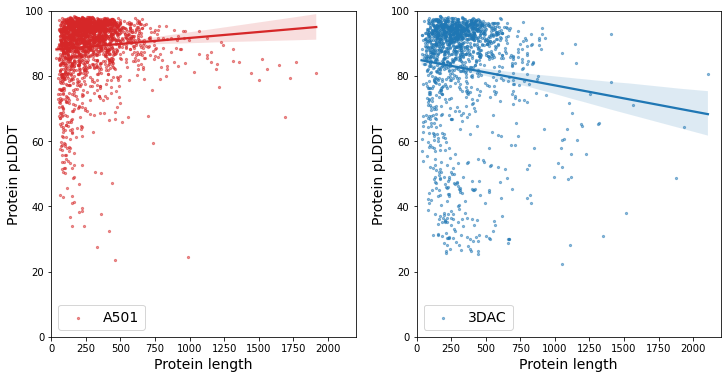

In [32]:
plt.figure(figsize=(12,6))

plt.subplot(121)

reg_line = sns.regplot(df_A501["sequence_length"],df_A501["model_3_ptm_avg_plddt"],color=color_list[0],label="A501",scatter_kws={"s":5,"alpha":0.5})
plt.xlabel("Protein length",fontsize=14)
plt.ylabel("Protein pLDDT",fontsize=14)
plt.legend(fontsize=14,loc="lower left")
plt.xlim(0,2200)
plt.ylim(0,100)


plt.subplot(122)
reg_line = sns.regplot(df_3DAC["sequence_length"],df_3DAC["model_3_ptm_avg_plddt"],color=color_list[1],label="3DAC",scatter_kws={"s":5,"alpha":0.5})
plt.xlabel("Protein length",fontsize=14)
plt.ylabel("Protein pLDDT",fontsize=14)
plt.legend(fontsize=14,loc="lower left")
plt.xlim(0,2200)
plt.ylim(0,100)

plt.savefig("Figure_length_plddt.png",dpi=300)

RanksumsResult(statistic=-1.9343846617357932, pvalue=0.05306585089107287)
RanksumsResult(statistic=-0.35198704536244146, pvalue=0.7248479778800789)


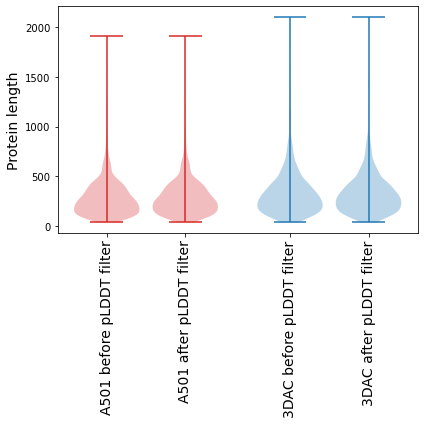

In [38]:
plt.figure(figsize=(6,6))


parts = plt.violinplot(df_A501["sequence_length"],positions=[0])
for pc in parts['bodies']:
    pc.set_facecolor(color_list[0])
parts['cbars'].set_color(color_list[0])
parts['cmaxes'].set_color(color_list[0])
parts['cmins'].set_color(color_list[0])


parts = plt.violinplot(df_A501[filter_function(df_A501)]["sequence_length"],positions=[0.6])
for pc in parts['bodies']:
    pc.set_facecolor(color_list[0])
parts['cbars'].set_color(color_list[0])
parts['cmaxes'].set_color(color_list[0])
parts['cmins'].set_color(color_list[0])

print(stats.ranksums(df_A501["sequence_length"],
                     df_A501[filter_function(df_A501)]["sequence_length"],
                     alternative='two-sided'))


parts = plt.violinplot(df_3DAC["sequence_length"],positions=[0+1.4])
for pc in parts['bodies']:
    pc.set_facecolor(color_list[1])
parts['cbars'].set_color(color_list[1])
parts['cmaxes'].set_color(color_list[1])
parts['cmins'].set_color(color_list[1])


parts = plt.violinplot(df_3DAC[filter_function(df_3DAC)]["sequence_length"],positions=[0.6+1.4])
for pc in parts['bodies']:
    pc.set_facecolor(color_list[1])
parts['cbars'].set_color(color_list[1])
parts['cmaxes'].set_color(color_list[1])
parts['cmins'].set_color(color_list[1])

print(stats.ranksums(df_3DAC["sequence_length"],
                     df_3DAC[filter_function(df_3DAC)]["sequence_length"],
                     alternative='two-sided'))

plt.ylabel("Protein length",fontsize=14)
plt.xticks([0,0.6,1.4,2],["A501 before pLDDT filter", "A501 after pLDDT filter", "3DAC before pLDDT filter", "3DAC after pLDDT filter"],fontsize=14,rotation=90)


plt.tight_layout()
plt.savefig("Figure_length_after_filter.png")